# Generating Datasets

QDFlow is capable of generating large, diverse datasets. To do this, we need to
generate many sets of randomized physics parameters. This is accomplished
through the `PhysicsRandomization` dataclass, which defines distributions from
which each physics parameter is drawn.

In [1]:
from qdflow import generate
import tutorial_helper
from qdflow.util import distribution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a randomization object with default distributions for each parameter
phys_rand = generate.PhysicsRandomization.default()

# Print out some of the default distributions
print("Screening Length: %s" % str(phys_rand.screening_length))
print("Gate Radius: %s" % str(phys_rand.rho))

Screening Length: distribution.LogUniform(75, 150)
Gate Radius: distribution.Uniform(10, 20)


Variable ranges can be adjusted by setting a parameter to a new distribution,
or to a specific value if no randomization is desired.

In [3]:
# Change the distribution from which the screening length is drawn
phys_rand.screening_length = distribution.Normal(100, 20)

# Set the gate radius to a constant (will not be randomized)
phys_rand.rho = 15

Now randomized sets of physics parameters can be drawn as desired from these
distributions.

In [4]:
generate.set_rng_seed(1) # Rng seed set for reproducibility

n_devices = 6 # How many randomized parameter sets to generate

# Generate a list of randomized sets of physics parameters
phys_params = generate.random_physics(phys_rand, n_devices)

Then, all that is required is to run the simulation with each of the physics
parameter sets.

In [5]:
# Smaller ranges and resolution used for the sake of time
V_x = np.linspace(3., 11., 50)
V_y = np.linspace(3., 11., 50)

# Run the simulation, this may take ~ 40 seconds
csds = [generate.calc_2d_csd(phys, V_x, V_y) for phys in phys_params]

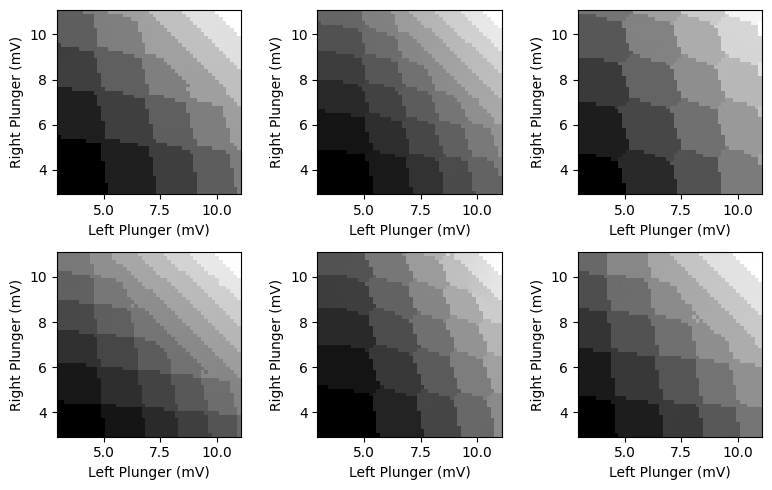

In [6]:
# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(8,5))
ax = ax.flatten()
for i in range(6):
    tutorial_helper.plot_csd_data(fig, ax[i], csds[i].sensor[:,:,0], x_y_vals=(csds[i].V_x, csds[i].V_y))
fig.tight_layout()